In [3]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib notebook
random.seed(9)

<IPython.core.display.Javascript object>


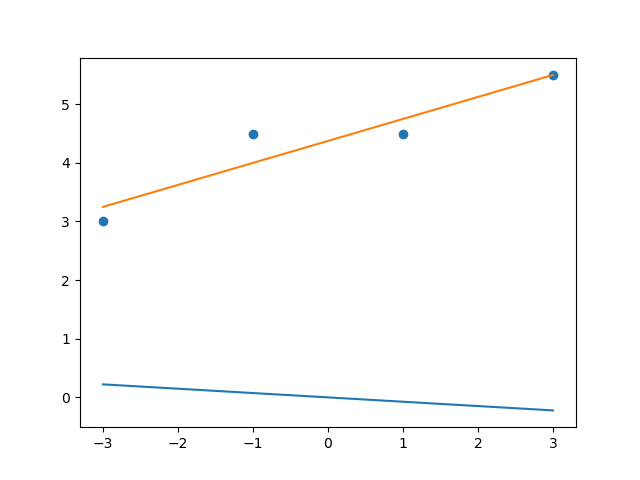

In [4]:
x_data = np.array([-3,-1,1,3])
t_data = np.array([3,4.5,4.5,5.5])

m_init = random.uniform(-1,1)
c_init = 0

x_input = tf.placeholder(dtype=tf.float32, shape =[None])
m = tf.Variable(m_init, dtype = tf.float32, name = "m")
c = tf.Variable(c_init, dtype = tf.float32, name = "c")
mx = tf.multiply(m,x_input)
y_model = tf.add(mx,c)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output = sess.run(y_model, feed_dict={x_input: x_data})

fig = plt.figure()
plt.scatter(x_data, t_data)
plt.plot(x_data, output)
fig.canvas.draw()

target = tf.placeholder(dtype=tf.float32, shape=[None])
error = tf.square(tf.subtract(y_model, target))
loss = tf.reduce_sum(error)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = optimizer.minimize(loss)

iterations = 100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        _, y_next = sess.run([train_step, y_model], feed_dict ={x_input: x_data, target: t_data})
        line, = plt.plot( x_data, y_next)
        fig.canvas.draw()
        line.remove()
plt.plot(x_data, y_next)
fig.canvas.draw()
